## Author : Abdallah Mohamed Saad
### EDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('../data/terror.csv', encoding="ISO-8859-1", index_col='eventid')
df.head()

C:\Users\beel\AppData\Local\Temp\ipykernel_31832\3767858798.py:5: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/terror.csv', encoding="ISO-8859-1", index_col='eventid')


,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
eventid,,,,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,East Asia,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [2]:
df.isnull().sum()

iyear              0
imonth             0
iday               0
approxdate    172452
extended           0
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 134, dtype: int64

### Fixing the data columns

In [3]:
df.rename(columns={'iyear': 'Year', 'imonth': 'Month', 'iday': 'Day', 'country_txt': 'Country', 'region_txt': 'Region',
                   'attacktype1_txt': 'AttackType', 'target1': 'Target', 'nkill': 'Killed', 'nwound': 'Wounded',
                   'summary': 'Summary', 'gname': 'Group', 'targtype1_txt': 'Target_type',
                   'weaptype1_txt': 'Weapon_type', 'motive': 'Motive'}, inplace=True)
df1 = df[
    ['Year', 'Month', 'Day', 'Country', 'Region', 'city', 'latitude', 'longitude', 'AttackType', 'Killed', 'Wounded',
     'Target', 'Summary', 'Group', 'Target_type', 'Weapon_type', 'Motive']]
df1['casualties'] = df1['Killed'] + df1['Wounded']
df1.head(3)

C:\Users\beel\AppData\Local\Temp\ipykernel_31832\3958817786.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['casualities'] = df1['Killed'] + df1['Wounded']


,Year,Month,Day,Country,Region,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,casualities
eventid,,,,,,,,,,,,,,,,,,
197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1.0
197000000002,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,0.0
197001000001,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1.0


In [4]:
df1.isnull().sum()

Year                0
Month               0
Day                 0
Country             0
Region              0
city              434
latitude         4556
longitude        4557
AttackType          0
Killed          10313
Wounded         16311
Target            636
Summary         66129
Group               0
Target_type         0
Weapon_type         0
Motive         131130
casualities     16874
dtype: int64

### Analysis

In [5]:
print('Country with Highest Terrorist Attacks:', df1['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:', df1['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:', df1['Killed'].max(), 'that took place in',
      df1.loc[df1['Killed'].idxmax()].Country)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


C:\Users\beel\PycharmProjects\TSFGRIPTasks\ven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


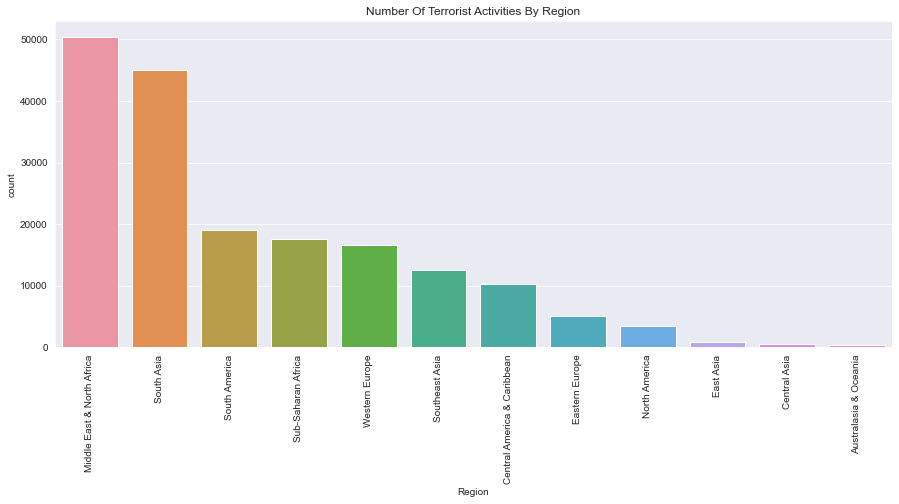

In [15]:
plt.subplots(figsize=(15, 6))
sns.countplot('Region', data=df1, order=df1['Region'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities By Region')
plt.show()

Middle East and North Africa are the most terrorism prone regions followed by South Asia. The Australian Region have experienced very few terrorist events.

C:\Users\beel\PycharmProjects\TSFGRIPTasks\ven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


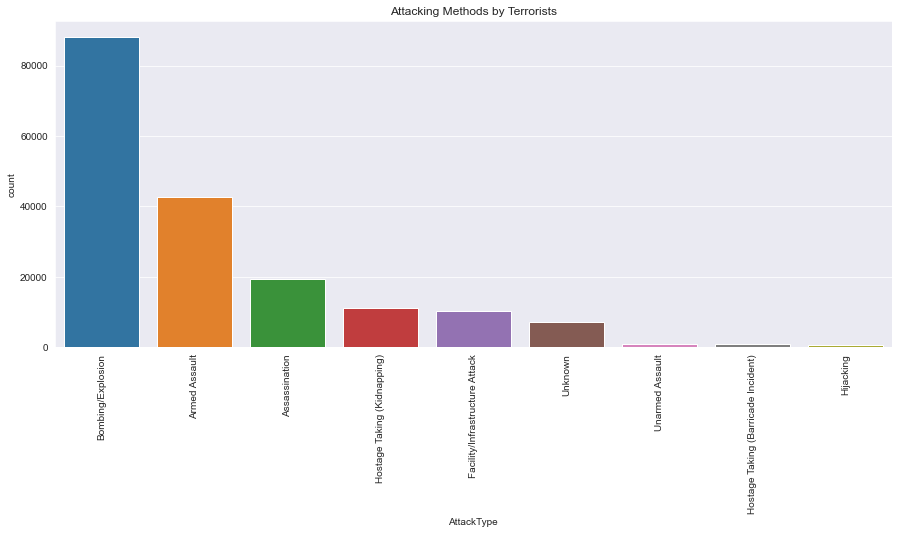

In [6]:
plt.subplots(figsize=(15, 6))
sns.countplot('AttackType', data=df1, order=df1['AttackType'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Attacking Methods by Terrorists')
plt.show()

Explosion and bombs are by far the most common used Attacking Methods

C:\Users\beel\PycharmProjects\TSFGRIPTasks\ven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


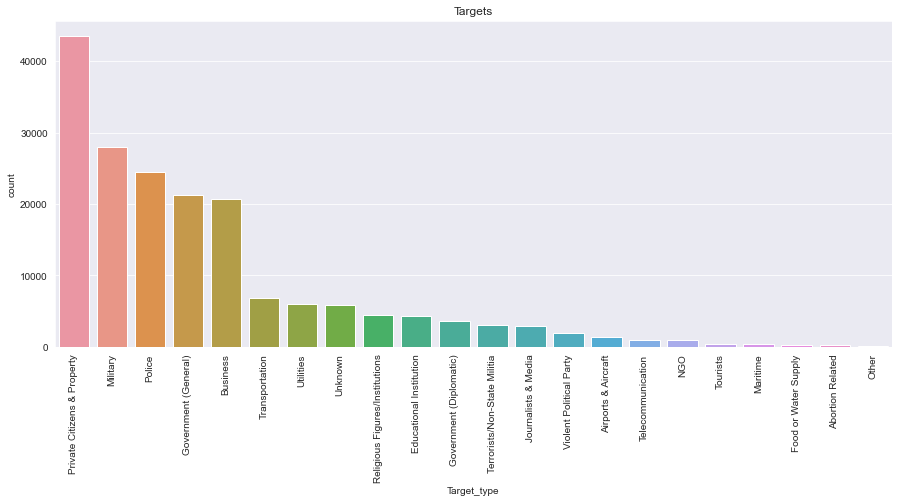

In [7]:
plt.subplots(figsize=(15, 6))
sns.countplot(df['Target_type'], order=df['Target_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Targets')
plt.show()

Private property, Military , Police,Government, and Business are the most likely to be targeted

C:\Users\beel\PycharmProjects\TSFGRIPTasks\ven\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


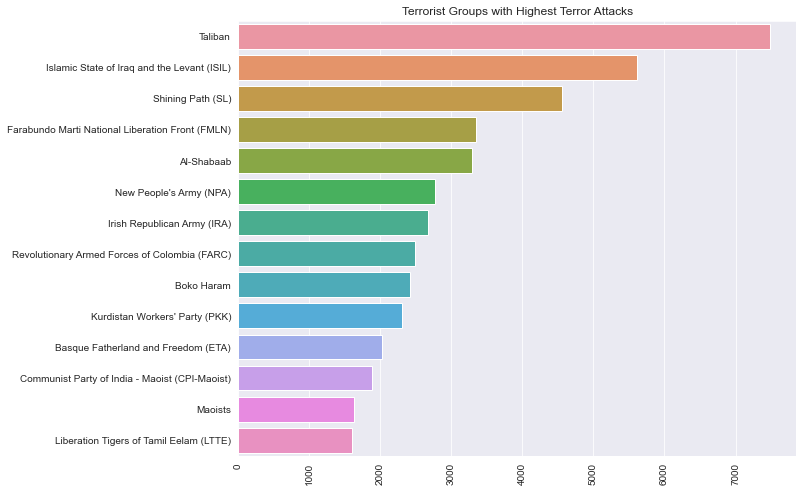

In [16]:
sns.barplot(df1['Group'].value_counts()[1:15].values, df1['Group'].value_counts()[1:15].index)
plt.xticks(rotation=90)
fig = plt.gcf()
fig.set_size_inches(10, 8)
plt.title('Terrorist Groups with Highest Terror Attacks')
plt.show()

In [25]:
terror_eg = df1[df1['Country'] == 'Egypt']
terror_eg.dropna(subset=['latitude', 'longitude'], inplace=True)

C:\Users\beel\AppData\Local\Temp\ipykernel_31832\1771001433.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  terror_eg.dropna(subset=['latitude', 'longitude'], inplace=True)


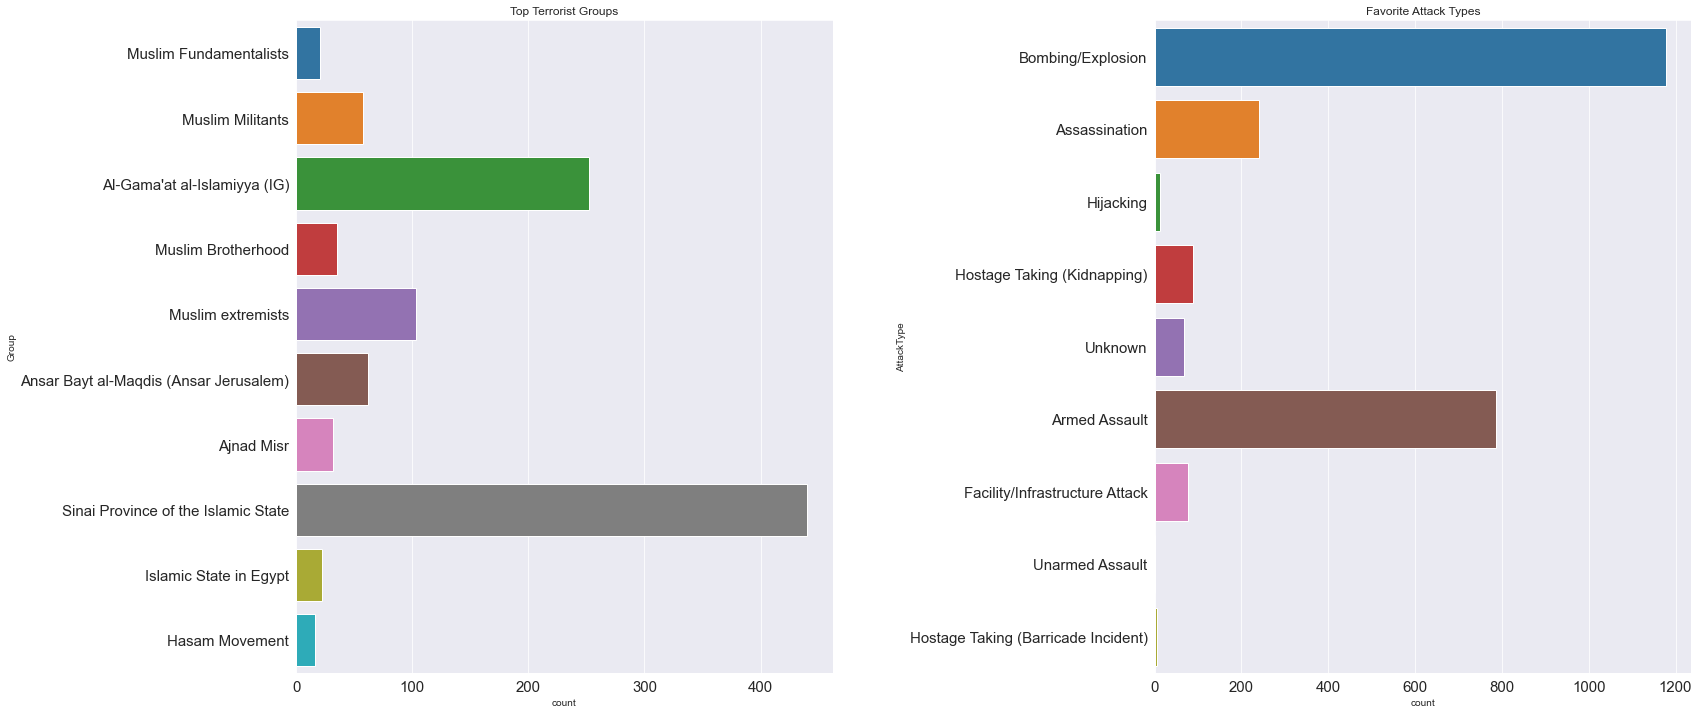

In [26]:
f, ax = plt.subplots(1, 2, figsize=(25, 12))
eg_groups = terror_eg['Group'].value_counts()[1:11].index
eg_groups = terror_eg[terror_eg['Group'].isin(eg_groups)]
sns.countplot(y='Group', data=eg_groups, ax=ax[0])
sns.countplot(y='AttackType', data=terror_eg, ax=ax[1])
plt.subplots_adjust(hspace=0.3, wspace=0.6)
ax[0].set_title('Top Terrorist Groups')
ax[1].set_title('Favorite Attack Types')
ax[0].tick_params(labelsize=15)
ax[1].tick_params(labelsize=15)
plt.show()